/home/karina/.local/lib/python3.8/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 1 is too high: all coefficients will experience boundary effects.
  warnings.warn(


ValueError: coeffs corresponds to a DWT performed over only a subset of the axes.  In this case, axes must be specified.

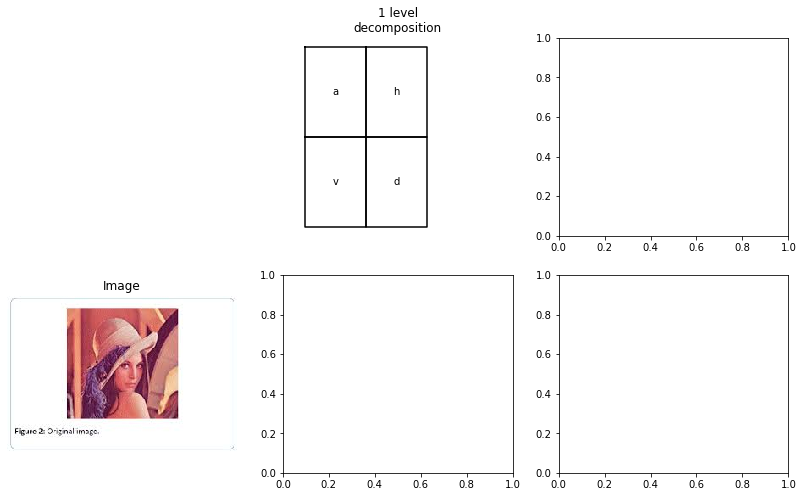

In [1]:
import numpy as np
import pywt
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x=mpimg.imread('/home/karina/images.jpeg')
shape = x.shape

max_lev = 2       
label_levels = 2 

fig, axes = plt.subplots(2, 3, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()